In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv') 
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_sample  = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)

In [7]:
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Pclass','Sex','Ticket','Cabin','Embarked']]

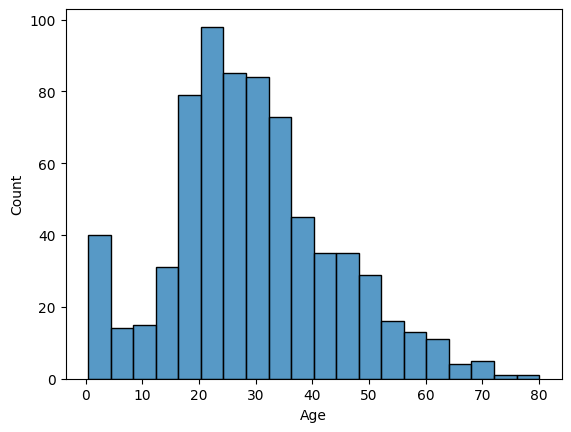

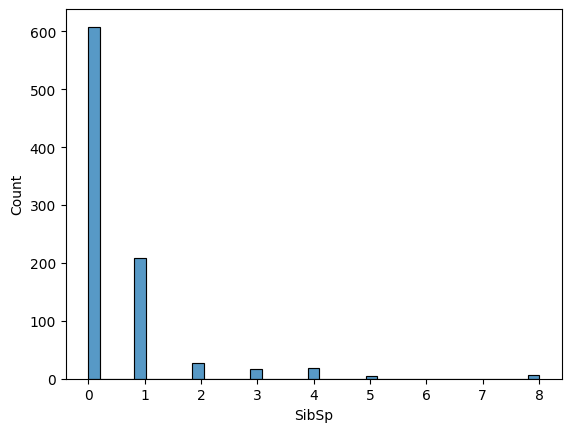

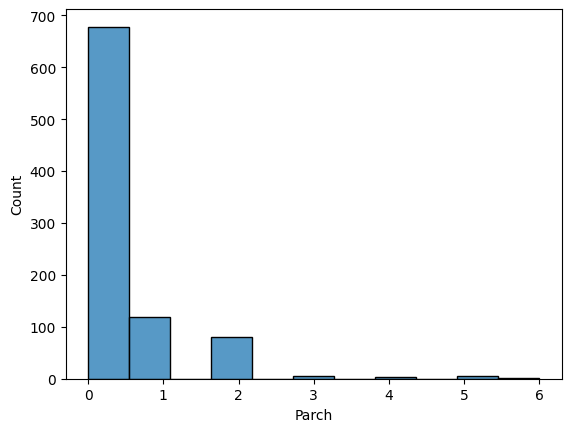

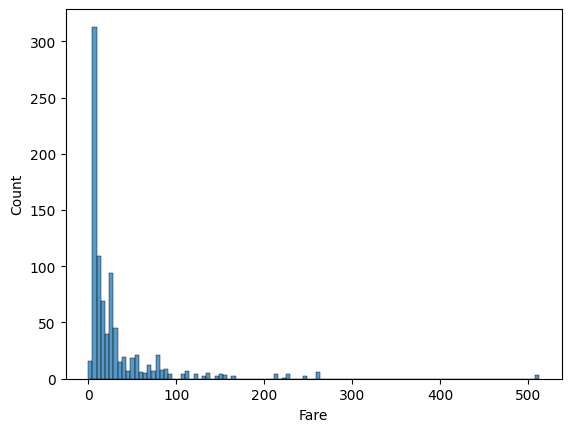

In [8]:
for i in df_num.columns:
    sns.histplot(data=df_num[i])
    plt.show()

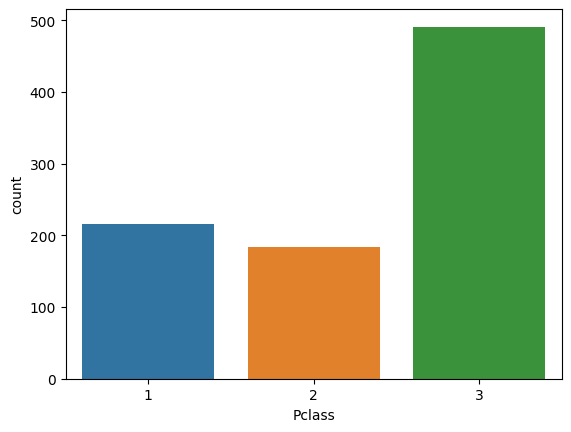

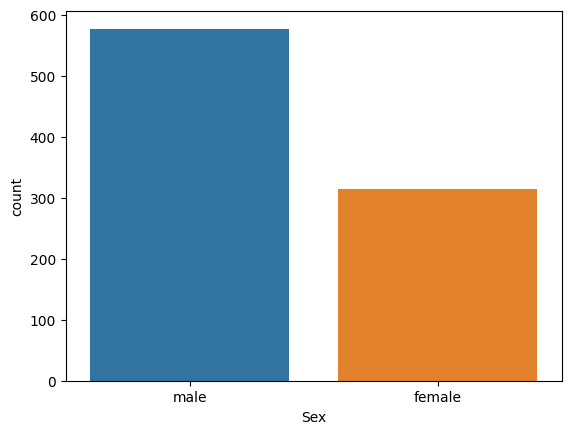

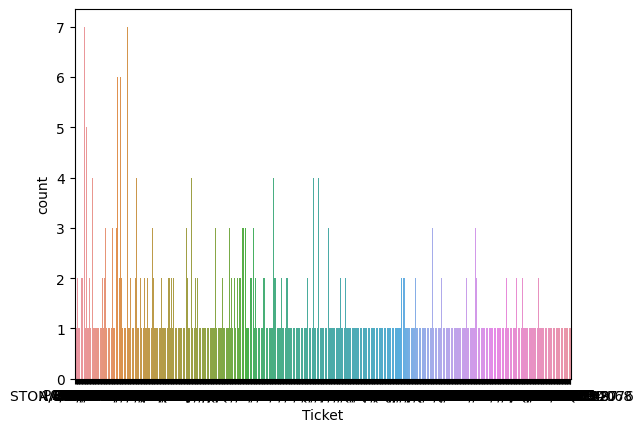

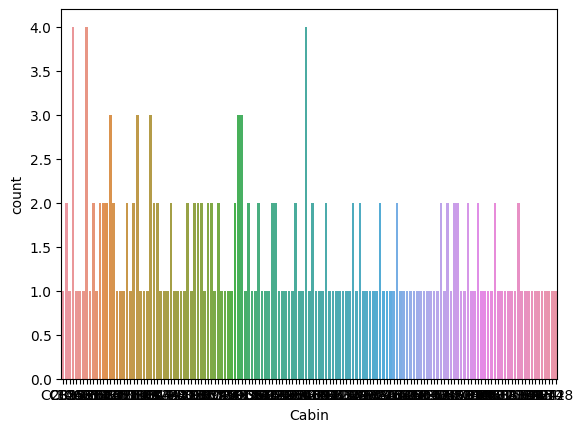

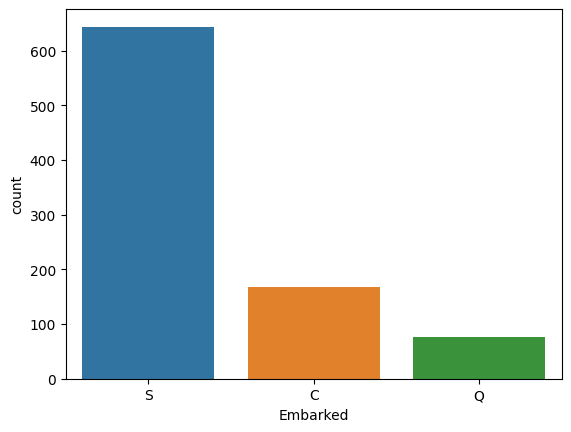

In [9]:
for column in df_cat.columns:
    sns.countplot(data=df_cat, x=column)
    plt.show()

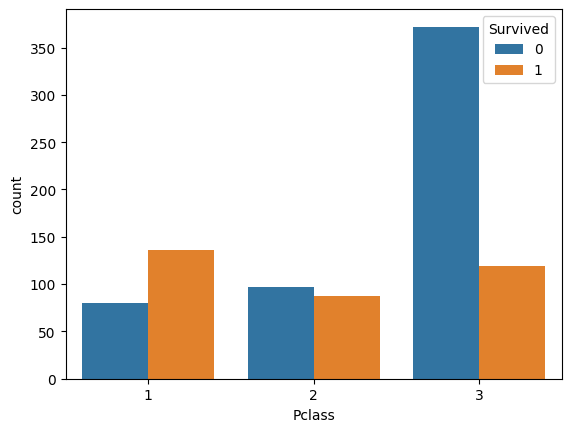

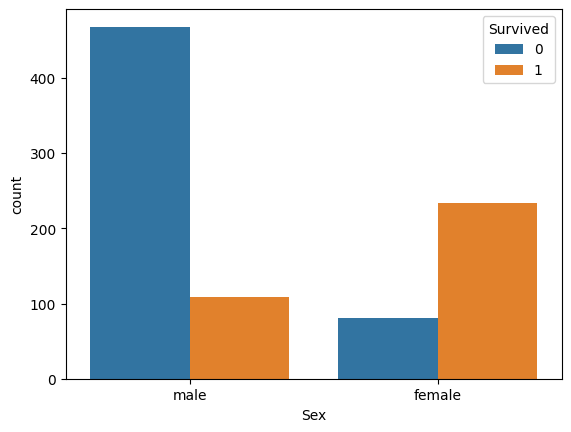

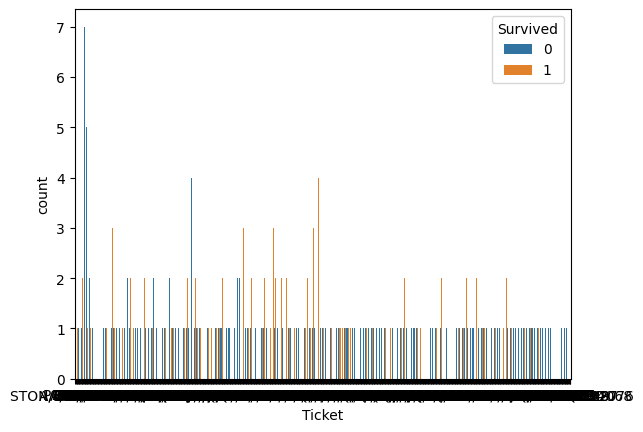

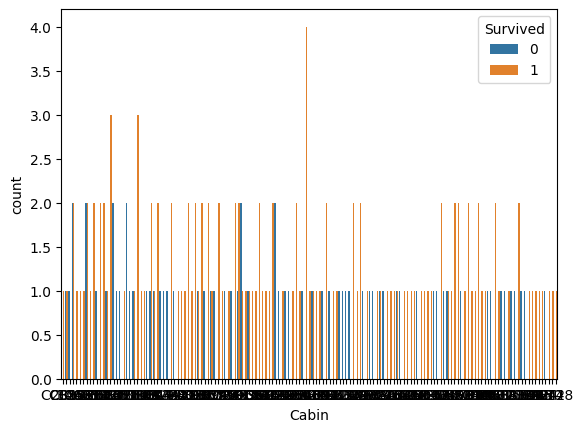

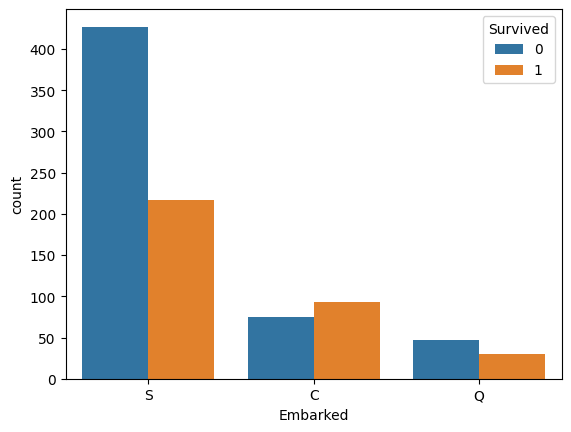

In [10]:
for column in df_cat.columns:
    sns.countplot(data=df_cat, x=column, hue=df_train['Survived'])
    plt.show()

<Axes: >

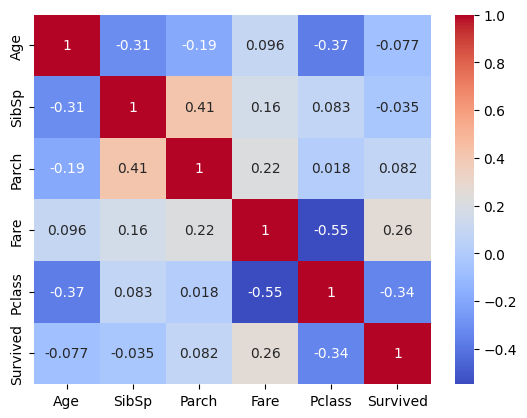

In [11]:
sns.heatmap(df_train[['Age','SibSp','Parch','Fare','Pclass','Survived']].corr(), annot=True, cmap='coolwarm')

In [12]:
count = df_train.isnull().sum().sort_values(ascending=False)
percentage = (df_train.isnull().sum()/df_train.count())
missing_data = pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_data

,count,percentage
Cabin,687,3.367647
Age,177,0.247899
Embarked,2,0.002250
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [13]:
df_train['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [14]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [15]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#FE column gender
dummy1 = pd.get_dummies(df_train['Sex'],drop_first=True).astype(int)
df_train.drop(['Sex'],axis=1,inplace=True)
df_train = pd.concat([df_train, dummy1],axis=1)

dummy2 = pd.get_dummies(df_test['Sex'],drop_first=True).astype(int)
df_test.drop(['Sex'],axis=1,inplace=True)
df_test = pd.concat([df_test, dummy2],axis=1)


#FE Embarked 
dummy1 = pd.get_dummies(df_train['Embarked']).astype(int)
df_train.drop(['Embarked'],axis=1,inplace=True)
df_train = pd.concat([df_train,dummy1],axis=1)

dummy2 = pd.get_dummies(df_test['Embarked']).astype(int)
df_test.drop(['Embarked'],axis=1,inplace=True)
df_test = pd.concat([df_test,dummy2],axis=1)

In [17]:
#Pclass get dummies 
dummy1 = pd.get_dummies(df_train['Pclass']).astype(int)
df_train.drop(['Pclass'],axis=1,inplace=True)
df_train = pd.concat([df_train,dummy1],axis=1)

dummy2 = pd.get_dummies(df_test['Pclass']).astype(int)
df_test.drop(['Pclass'],axis=1,inplace=True)
df_test = pd.concat([df_test,dummy2],axis=1)

In [18]:
#Extracting title from Name 
df_train['Name'] = df_train['Name'].apply(lambda x : x.split(',')[1].split('.')[0])
df_test['Name'] = df_test['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

dummy1 = pd.get_dummies(df_train['Name']).astype(int)
df_train.drop(['Name'],axis=1,inplace=True)
df_train = pd.concat([df_train,dummy1],axis=1)

dummy2 = pd.get_dummies(df_test['Name']).astype(int)
df_test.drop(['Name'],axis=1,inplace=True)
df_test = pd.concat([df_test,dummy2],axis=1)

In [19]:
#Extracting whether a ticket has a string in it
df_train['Ticket'] = df_train['Ticket'].apply(lambda x : 1 if x.isnumeric() else 0)
df_test['Ticket'] = df_test['Ticket'].apply(lambda x : 1 if x.isnumeric() else 0)

In [20]:
#Cabins start with strings. Can extract that and the values that are Null can be zero 
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: 0 if pd.isna(x) else x[0])
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else x[0])

dummy1 = pd.get_dummies(df_train['Cabin']).astype(int)
df_train.drop(['Cabin'],axis=1,inplace=True)
df_train = pd.concat([df_train,dummy1],axis=1)

dummy2 = pd.get_dummies(df_test['Cabin']).astype(int)
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test = pd.concat([df_test,dummy2],axis=1)

df_train.drop([0],axis=1,inplace=True)
df_test.drop([0],axis=1,inplace=True)

In [21]:
df_train

,Survived,Age,SibSp,Parch,Ticket,Fare,male,C,Q,S,...,Sir,the Countess,A,B,C,D,E,F,G,T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,0,7.2500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,38.0,1,0,0,71.2833,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,26.0,0,0,0,7.9250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,35.0,1,0,1,53.1000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,35.0,0,0,1,8.0500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,1,13.0000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,1,19.0,0,0,1,30.0000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
889,0,28.0,1,2,0,23.4500,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train['Age'] = scaler.fit_transform(df_train[['Age']])
df_test['Age'] = scaler.fit_transform(df_test[['Age']])

In [23]:
scaler = MinMaxScaler()
df_train['Fare'] = scaler.fit_transform(df_train[['Fare']])
df_test['Fare'] = scaler.fit_transform(df_test[['Fare']])

In [24]:
#Run Machine learning algorithms 
X_train = df_train.drop(['Survived'],axis=1)
y_train = df_train['Survived']
X_test = df_test

X_train.columns.values[6] = 'C_1'  
X_test.columns.values[6] = 'C_1' 

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)




In [25]:
# Identify discrepancies
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

extra_columns_in_train = train_columns - test_columns
extra_columns_in_test = test_columns - train_columns

missing_columns = extra_columns_in_test.union(extra_columns_in_train)
for column in missing_columns:
    X_train[column] = 0  
    X_test[column] = 0   
    
X_test = X_test[X_train.columns]
    

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [27]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.72067039 0.70786517 0.75280899 0.7752809  0.83146067]
0.7576172242797062


In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.81460674 0.83146067 0.81460674 0.85393258]
0.8260498399347185


In [29]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.76404494 0.81460674 0.75280899 0.80898876]
0.778927876467265


In [30]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.78089888 0.85393258 0.7752809  0.85955056]
0.8125918021467579


In [31]:
rf = RandomForestClassifier()
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.7752809  0.84831461 0.73595506 0.81460674]
0.8001945891657775


In [32]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.82022472 0.8258427  0.80337079 0.85393258]
0.8282719226664993


In [33]:
xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80446927 0.81460674 0.87640449 0.79775281 0.83146067]
0.824938798568828


In [34]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.82022472 0.83707865 0.79775281 0.86516854]
0.8260561170045821


In [35]:
#voting_clf.fit(X_train,y_train)
#pred_1 = voting_clf.predict(X_test).astype(int)

#first_submission = {'PassengerId': df_test.index, 'Survived': pred_1}
#first_submission = pd.DataFrame(data=first_submission)
#first_submission.to_csv('submission.csv', index=False)

In [36]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform, expon

def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [37]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8282907538760906
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [38]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8271671583704727
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [39]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['sqrt'],  # Set max_features to 'sqrt'
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Random Forest
Best Score: 0.832772581758835
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [40]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8496139602033772
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.55}


In [41]:
pred_1 = best_clf_rf.best_estimator_.predict(X_test).astype(int)

first_submission = {'PassengerId': df_test.index, 'Survived': pred_1}
first_submission = pd.DataFrame(data=first_submission)
first_submission.to_csv('submission.csv', index=False)